## 04. Правене на карти
### Съдържание
1. Използвани библиотеки
2. Подготовка
3. Точкова карта
4. Топлинна карта
5. Хороплетна карта
6. Карта с пропорционален символ

#### 1. Използвани библиотеки
Изпозват се библиотеките pandas, numpy, matplotlib, seaborn, gopandas и contextily.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

#### 2. Подготовка
Прочитане на атрибутивната таблица

In [2]:
data = pd.read_excel(r'/home/nitro5/Desktop/data/GIS/2nd_semestur/cartography/data/data_final.xlsx')

Прочитане на файл за областите в България. Визуализиране на областите.

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'POP_21', 'geometry'],
      dtype='object')
EPSG:4326


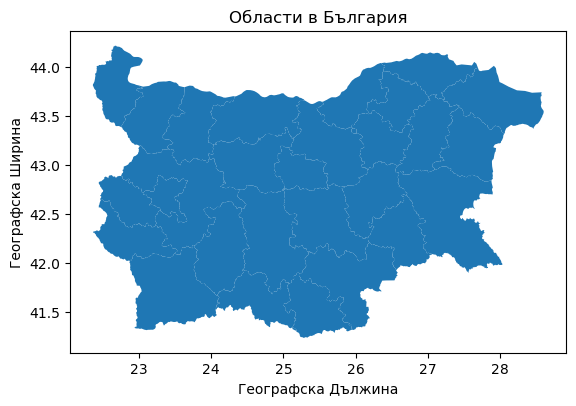

In [3]:
# Path to the shapefile
shapefile_path = r'data/Regions_BG/Regions_BG.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.columns)

# Print the CRS (Coordinate Reference System)
print(gdf.crs)

# Plot the shapefile
gdf.plot()
plt.title("Области в България")  # Add a title
plt.xlabel("Географска Дължина")  # Add axis labels (if applicable)
plt.ylabel("Географска Ширина")
plt.show()

Съдържание на файла за областите.

In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NUTS_ID     28 non-null     object  
 1   LEVL_CODE   28 non-null     int64   
 2   CNTR_CODE   28 non-null     object  
 3   NAME_LATN   28 non-null     object  
 4   NUTS_NAME   28 non-null     object  
 5   MOUNT_TYPE  28 non-null     int64   
 6   URBN_TYPE   28 non-null     int64   
 7   COAST_TYPE  28 non-null     int64   
 8   FID         28 non-null     object  
 9   POP_21      28 non-null     int64   
 10  geometry    28 non-null     geometry
dtypes: geometry(1), int64(5), object(5)
memory usage: 2.5+ KB


Преглед на горните 5 реда.

In [5]:
gdf.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,POP_21,geometry
0,BG412,3,BG,Sofia,София,3,3,3,BG412,231989,"POLYGON ((23.41277 43.16052, 23.41644 43.15684..."
1,BG341,3,BG,Burgas,Бургас,4,2,1,BG341,380286,"MULTIPOLYGON (((27.88262 42.83841, 27.88613 42..."
2,BG332,3,BG,Dobrich,Добрич,4,2,1,BG332,150146,"MULTIPOLYGON (((28.57888 43.73874, 28.57256 43..."
3,BG333,3,BG,Shumen,Шумен,4,2,3,BG333,151465,"POLYGON ((27.21954 43.66462, 27.21738 43.66390..."
4,BG315,3,BG,Lovech,Ловеч,3,2,3,BG315,116394,"POLYGON ((25.14043 43.26683, 25.13844 43.25341..."


Генериране на колонки за координатите на центроидите.

In [6]:
gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

/tmp/ipykernel_60059/2321957141.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_x'] = gdf.geometry.centroid.x
/tmp/ipykernel_60059/2321957141.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid_y'] = gdf.geometry.centroid.y


Преглед на готовия файл за вековните дървета в България.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   №                        2105 non-null   float64
 1   Дървесен вид             2105 non-null   object 
 2   Вид на документа         2047 non-null   object 
 3   Номер на документа       2047 non-null   object 
 4   Дата                     2047 non-null   object 
 5   ДВ                       1552 non-null   object 
 6   Населено място           2103 non-null   object 
 7   Община                   2105 non-null   object 
 8   Област                   2105 non-null   object 
 9   РИОСВ                    2105 non-null   object 
 10  Възраст в години         1805 non-null   float64
 11  Височина                 2026 non-null   object 
 12  Обиколка                 1932 non-null   float64
 13  Диаметър                 221 non-null    float64
 14  Особености              

Преименуване на колонката Област във файла и правене на ляв джойн с файла за областите.

In [8]:
data = data.rename(columns={'Област': 'NUTS_NAME'})

In [9]:
merged_df = pd.merge(data, gdf, on='NUTS_NAME', how='left')

#### 3. Точкова карта
Генериране на точки на база географската дължина и ширина на дърветата.

In [10]:
points = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Географска дължина'], data['Географска ширина']), crs="EPSG:4326") # WGS 84

Визуализиране на картата и експортиране на резултата.

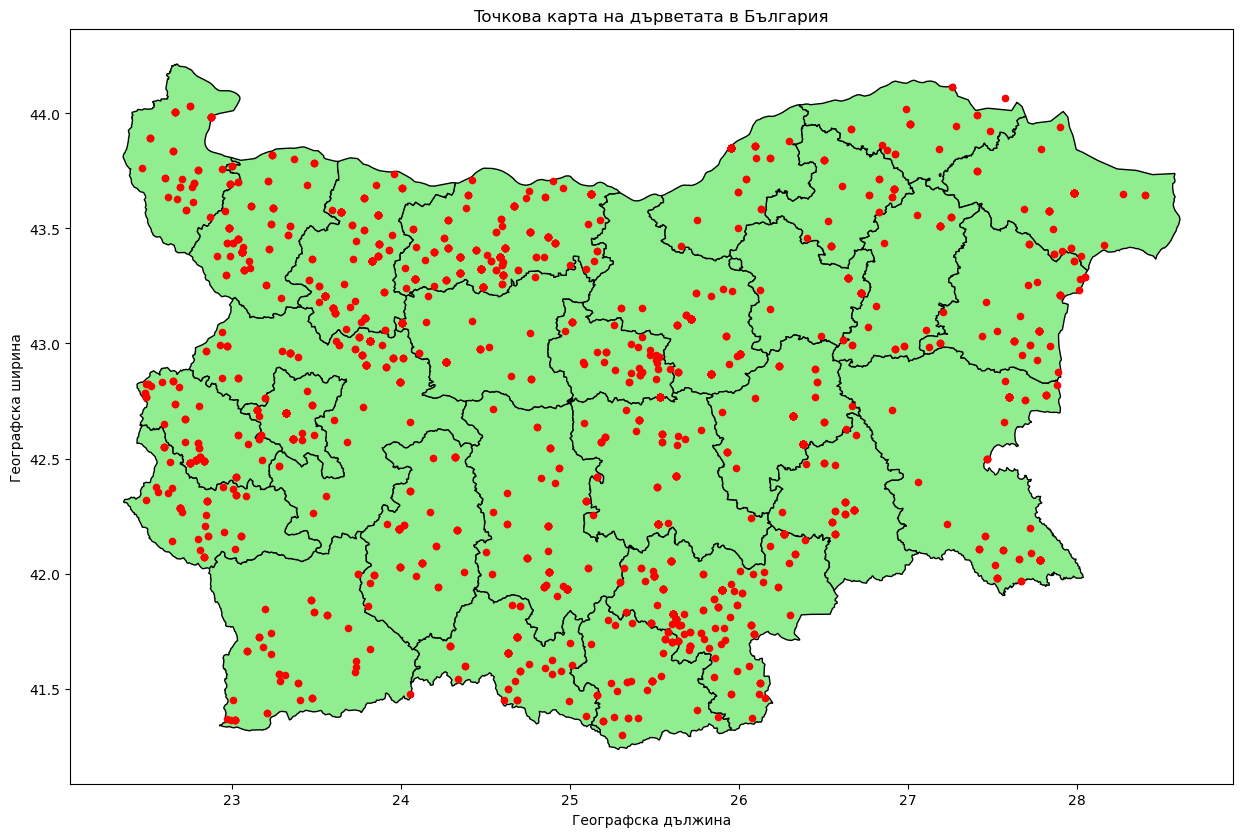

In [11]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the original polygons
gdf.plot(ax=ax, color='lightgreen', edgecolor='black')
points.plot(ax=ax, color='red', markersize=20, legend=True) # Customize color and size
plt.title("Toчкова карта на дърветата в България")
plt.xlabel("Географска дължина")
plt.ylabel("Географска ширина")
#fig.savefig("dot_map_python.png", dpi=300, bbox_inches="tight")
plt.show()

#### 4. Топлинна карта
Генериране и експортиране на топлинната карта. Не се получава особено добре има разминаване между картата на България и топлинната карта.

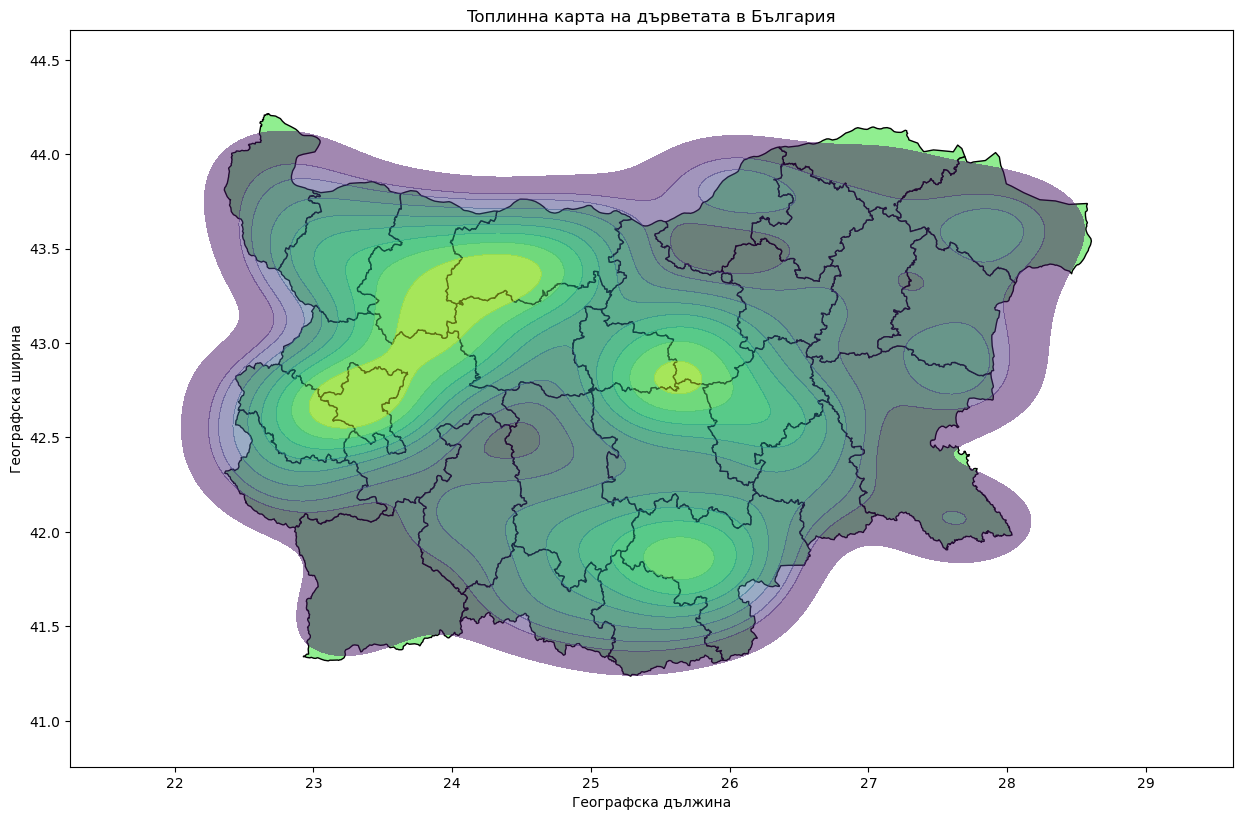

In [12]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the original polygons
gdf.plot(ax=ax, color='lightgreen', edgecolor='black')
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Background map
sns.kdeplot(x=data['Географска дължина'], y=data['Географска ширина'], fill=True, cmap="viridis", alpha=0.5, legend = True) #2d density plot, fill for heatmap
plt.title("Toплинна карта на дърветата в България")
plt.xlabel("Географска дължина")
plt.ylabel("Географска ширина")
#fig.savefig("heat_map_python.png", dpi=300, bbox_inches="tight")
plt.show()

#### 5. Хороплетна карта
Преглед на колонките на обединения файл.

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   №                        2105 non-null   float64 
 1   Дървесен вид             2105 non-null   object  
 2   Вид на документа         2047 non-null   object  
 3   Номер на документа       2047 non-null   object  
 4   Дата                     2047 non-null   object  
 5   ДВ                       1552 non-null   object  
 6   Населено място           2103 non-null   object  
 7   Община                   2105 non-null   object  
 8   NUTS_NAME                2105 non-null   object  
 9   РИОСВ                    2105 non-null   object  
 10  Възраст в години         1805 non-null   float64 
 11  Височина                 2026 non-null   object  
 12  Обиколка                 1932 non-null   float64 
 13  Диаметър                 221 non-null    float64 
 14  Особенос

Създване на нов файл counts и обединяването му за да получим абсолютните бройки на дърветата по област.

In [14]:
counts = merged_df['NUTS_NAME'].value_counts().reset_index()  # reset_index() is crucial
counts.columns = ['NUTS_NAME', 'Честота']  # Rename columns for clarity
merged_df = pd.merge(merged_df, counts, on='NUTS_NAME', how='left')

Смяна на имената на стойността на София-град за да е еднаква за 2та файла преди обединението за да се обедини правилно.

In [15]:
counts.loc[counts['NUTS_NAME'] == 'София-град', 'NUTS_NAME'] = 'София (столица)'

Правене на ляв джоин.

In [16]:
merged_gdf = pd.merge(gdf, counts, on='NUTS_NAME', how='left')

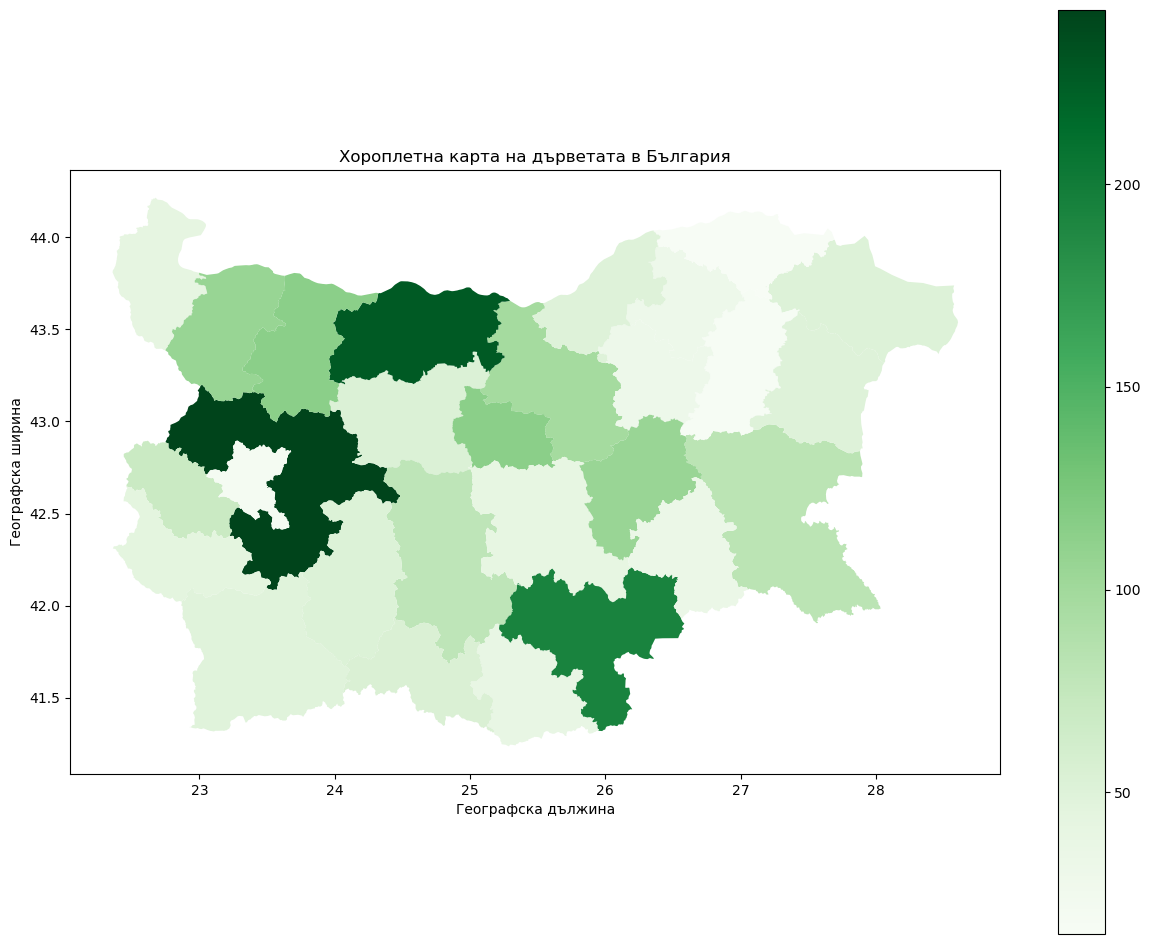

In [17]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(15, 12))

# Plot the original polygons
merged_gdf.plot(ax = ax, column="Честота", legend = True,  cmap='Greens');
plt.title("Хороплетна карта на дърветата в България")
plt.xlabel("Географска дължина")
plt.ylabel("Географска ширина")
#fig.savefig("choropleth_map_python.png", dpi=300, bbox_inches="tight")
plt.show()

#### 6. Карта с пропорционален символ
Стандартизиране на големината на символа от минимума до максимума.

In [18]:
min_value = merged_gdf['Честота'].min()
max_value = merged_gdf['Честота'].max()

# Method 1: Linear scaling (most common)
merged_gdf['point_size'] = ((merged_gdf['Честота'] - min_value) / (max_value - min_value)) * 1000

Генериране на географските координати на центроида на областта.

In [19]:
points_centroid = gpd.GeoDataFrame(merged_gdf, geometry=gpd.points_from_xy(merged_gdf['centroid_x'], merged_gdf['centroid_y']), crs="EPSG:4326") # WGS 84

Разгледах различни опции за маркер, възможностите с тази библиотека са по-малки, трябва да се проучат други библиотеки.

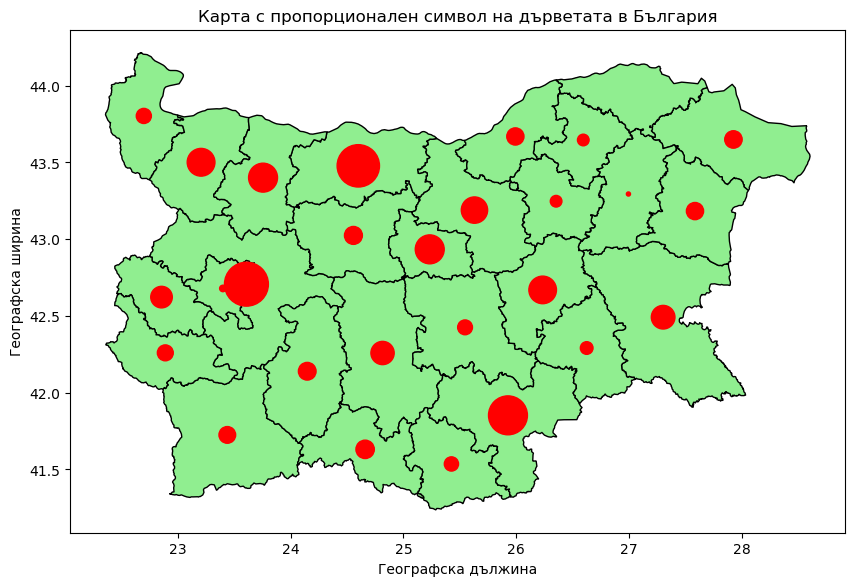

In [20]:
# Adjust the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the original polygons
merged_gdf.plot(ax=ax, color='lightgreen', edgecolor='black')
points_centroid.plot(ax=ax, marker='o', color='red', markersize=points_centroid['point_size'], legend = True)  # Customize point style
plt.title("Карта с пропорционален символ на дърветата в България")
plt.xlabel("Географска дължина")
plt.ylabel("Географска ширина")
#fig.savefig("proportional_map_python.png", dpi=300, bbox_inches="tight")
plt.show()

#### 7. Заключение
Генерирането на карти с библиотеките matplotlib.pyplot и geopandas не е много сполучливо, за разлика от други софтуери, тук няма print preview за оформление. Има 2 варианта за процедиране или да се потърсят и разчучат други библиотеки или да се генерират картите на друг софтуер, ще се спрем на второто.